In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
df = pd.read_excel('data3.xlsx')

In [17]:
df.head()

,Unnamed: 0,record_id,athlete_id,event_name,event_date,n_runners,finish_time,position,athlete_gender,athlete_age,...,humidity,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface
0,22732,8002,790131949,Александрино,2023-05-27,24,1413,4,мужской,32,...,71,6.79,40,6.00,300,Clouds,scattered clouds,NaN,NaN,грунт
1,43498,9401,790127832,Александрино,2023-07-22,25,1927,17,женский,38,...,72,12.81,40,8.05,260,Clouds,scattered clouds,NaN,NaN,грунт
2,65916,7495,790113063,Александрино,2023-05-06,28,1537,6,женский,48,...,42,-6.46,40,6.00,10,Clouds,scattered clouds,NaN,NaN,грунт
3,65895,8858,790130321,Александрино,2023-07-01,28,1520,8,мужской,48,...,56,13.68,0,4.02,270,Clear,clear sky,NaN,NaN,грунт
4,25323,8011,790131645,Александрино,2023-05-13,33,1520,7,мужской,33,...,55,6.06,0,4.02,320,Clear,clear sky,NaN,NaN,грунт


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74368 entries, 0 to 74367
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 74368 non-null  int64         
 1   record_id                  74368 non-null  int64         
 2   athlete_id                 74368 non-null  int64         
 3   event_name                 74368 non-null  object        
 4   event_date                 74368 non-null  datetime64[ns]
 5   n_runners                  74368 non-null  int64         
 6   finish_time                74368 non-null  int64         
 7   position                   74368 non-null  int64         
 8   athlete_gender             74368 non-null  object        
 9   athlete_age                74368 non-null  int64         
 10  best_time                  74368 non-null  int64         
 11  worst_time                 74368 non-null  int64         
 12  mean

In [21]:
topFast = df.groupby('event_name').agg({'finish_time': 'mean'}).reset_index()
topFast = topFast.sort_values(by='finish_time')
topFast.columns = ['event_name', 'city_mean_time'] 
topFast

,event_name,city_mean_time
80,Парк Кирова,1560.584795
35,Йошкар-Ола Аллея Здоровья,1608.799117
105,Сосновка,1654.939616
100,Сириус,1666.017408
5,Боева Дача,1671.324971
...,...,...
26,Железноводский,2123.724576
107,Стрежевой Городской парк,2217.834146
86,Петровская набережная,2219.541096
29,Зеленогорск набережная,2263.825397


In [23]:
topSlow = df.groupby('event_name').agg({'finish_time': 'mean'}).reset_index()
topSlow = topSlow.sort_values(by='finish_time', ascending=[0])
topSlow.columns = ['event_name', 'city_mean_time'] 
topSlow

,event_name,city_mean_time
113,Томск Сосновый Бор,2520.465074
29,Зеленогорск набережная,2263.825397
86,Петровская набережная,2219.541096
107,Стрежевой Городской парк,2217.834146
26,Железноводский,2123.724576
...,...,...
5,Боева Дача,1671.324971
100,Сириус,1666.017408
105,Сосновка,1654.939616
35,Йошкар-Ола Аллея Здоровья,1608.799117


In [24]:
topFast_cities = topFast.head(5)['event_name'].unique()
topFast_cities

array(['Парк Кирова', 'Йошкар-Ола Аллея Здоровья', 'Сосновка', 'Сириус',
       'Боева Дача'], dtype=object)

In [25]:
topSlow_cities = topSlow.head(5)['event_name'].unique()
topSlow_cities

array(['Томск Сосновый Бор', 'Зеленогорск набережная',
       'Петровская набережная', 'Стрежевой Городской парк',
       'Железноводский'], dtype=object)

In [30]:
dfFast = df[df['event_name'].isin(topFast_cities)]
dfFast = dfFast.sort_values(by='event_name')
dfFastFull = pd.merge(dfFast, topFast, on='event_name')
dfFastFull

,Unnamed: 0,record_id,athlete_id,event_name,event_date,n_runners,finish_time,position,athlete_gender,athlete_age,...,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface,city_mean_time
0,6055,11270,790138113,Боева Дача,2023-09-30,87,1587,58,мужской,14,...,8.49,0,1.00,0,Clear,clear sky,NaN,NaN,асфальт и тротуарная плитка,1671.324971
1,34464,11658,790152599,Боева Дача,2023-10-14,62,1608,40,мужской,36,...,5.08,0,4.02,160,Clear,clear sky,NaN,NaN,асфальт и тротуарная плитка,1671.324971
2,38629,13595,790136382,Боева Дача,2023-12-23,40,1639,26,мужской,37,...,-0.47,100,3.00,230,Clouds,overcast clouds,NaN,NaN,асфальт и тротуарная плитка,1671.324971
3,34723,11434,790152599,Боева Дача,2023-10-07,49,1669,37,мужской,36,...,-0.24,0,4.92,232,Clear,clear sky,NaN,NaN,асфальт и тротуарная плитка,1671.324971
4,34478,7736,790135453,Боева Дача,2023-05-20,63,1616,41,женский,36,...,8.01,0,7.15,60,Clear,clear sky,NaN,NaN,асфальт и тротуарная плитка,1671.324971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,56197,7577,790134411,Сосновка,2023-05-13,80,1891,65,женский,42,...,9.12,16,2.19,304,Clouds,few clouds,NaN,NaN,грунт,1654.939616
3107,67124,13319,790145966,Сосновка,2023-12-09,56,1707,32,женский,49,...,-14.43,99,4.60,123,Clouds,overcast clouds,NaN,NaN,грунт,1654.939616
3108,34756,12706,790154884,Сосновка,2023-11-18,70,1678,43,мужской,36,...,-6.61,80,4.42,231,Clouds,broken clouds,NaN,NaN,грунт,1654.939616
3109,20079,6421,790129846,Сосновка,2023-03-25,48,1853,40,мужской,30,...,4.59,91,7.64,217,Clouds,overcast clouds,NaN,NaN,грунт,1654.939616


In [31]:
dfSlow = df[df['event_name'].isin(topSlow_cities)]
dfSlow = dfSlow.sort_values(by='event_name')
dfSlowFull = pd.merge(dfSlow, topSlow, on='event_name')
dfSlowFull.to_excel('')
dfSlowFull

,Unnamed: 0,record_id,athlete_id,event_name,event_date,n_runners,finish_time,position,athlete_gender,athlete_age,...,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface,city_mean_time
0,23950,13846,790159190,Железноводский,2023-12-30,10,1937,7,мужской,32,...,-4.42,0,4.00,280,Clear,clear sky,NaN,NaN,тротуарная плитка,2123.724576
1,36391,5292,790127180,Железноводский,2023-01-28,11,2101,7,мужской,36,...,-6.00,100,9.00,120,Clouds,overcast clouds,NaN,NaN,тротуарная плитка,2123.724576
2,29245,7741,790115029,Железноводский,2023-05-20,11,2051,6,женский,34,...,7.54,100,6.00,100,Clouds,overcast clouds,NaN,NaN,тротуарная плитка,2123.724576
3,18939,10135,790147799,Железноводский,2023-08-19,14,2186,11,женский,29,...,10.30,25,2.00,310,Clouds,scattered clouds,NaN,NaN,тротуарная плитка,2123.724576
4,12221,11957,790136684,Железноводский,2023-10-21,12,2957,7,женский,22,...,5.54,5,2.00,320,Clear,clear sky,NaN,NaN,тротуарная плитка,2123.724576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,64737,9450,790142368,Томск Сосновый Бор,2023-07-29,11,1515,1,мужской,47,...,17.92,84,1.34,9,Clouds,broken clouds,NaN,NaN,смешанное,2520.465074
1896,57099,8925,790142432,Томск Сосновый Бор,2023-07-08,18,3537,17,женский,42,...,18.97,96,0.68,279,Clouds,overcast clouds,NaN,NaN,смешанное,2520.465074
1897,9030,12793,790159116,Томск Сосновый Бор,2023-11-25,45,1850,13,мужской,17,...,-1.44,100,3.87,124,Snow,light snow,NaN,0.38,смешанное,2520.465074
1898,56899,11600,790155286,Томск Сосновый Бор,2023-10-14,61,2461,42,женский,42,...,0.03,27,5.33,202,Clouds,scattered clouds,NaN,NaN,смешанное,2520.465074


(array([ 34., 163., 369., 543., 656., 529., 317., 219., 141.,  74.,  26.,
         21.,   9.,   3.,   4.,   0.,   1.,   0.,   0.,   2.]),
 array([ 965. , 1104.1, 1243.2, 1382.3, 1521.4, 1660.5, 1799.6, 1938.7,
        2077.8, 2216.9, 2356. , 2495.1, 2634.2, 2773.3, 2912.4, 3051.5,
        3190.6, 3329.7, 3468.8, 3607.9, 3747. ]),
 <BarContainer object of 20 artists>)

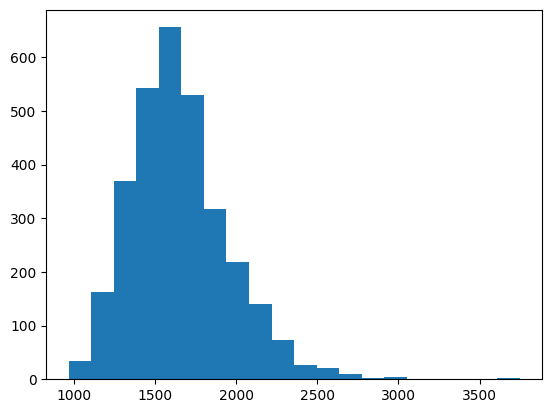

In [32]:
plt.hist(dfFastFull['finish_time'], bins=20)

(array([ 42.,  80., 119., 188., 160., 199., 177., 129., 123., 125., 100.,
         91., 102., 116.,  69.,  37.,  23.,  11.,   3.,   6.]),
 array([1147. , 1297.4, 1447.8, 1598.2, 1748.6, 1899. , 2049.4, 2199.8,
        2350.2, 2500.6, 2651. , 2801.4, 2951.8, 3102.2, 3252.6, 3403. ,
        3553.4, 3703.8, 3854.2, 4004.6, 4155. ]),
 <BarContainer object of 20 artists>)

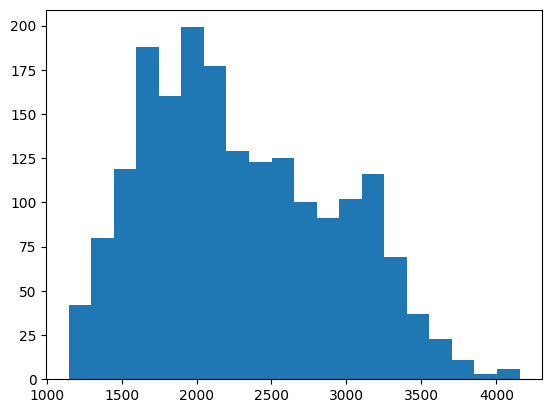

In [33]:
plt.hist(dfSlowFull['finish_time'], bins=20)

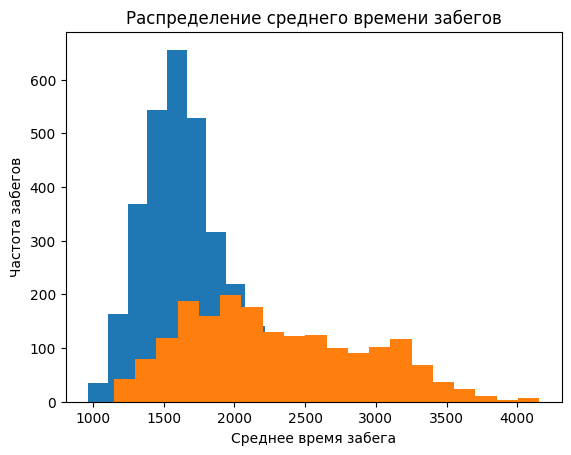

In [39]:
fastH =plt.hist(dfFastFull['finish_time'], bins=20)
slowH = plt.hist(dfSlowFull['finish_time'], bins=20)
plt.xlabel('Среднее время забега')
plt.ylabel('Частота забегов')
plt.title('Распределение среднего времени забегов')
plt.savefig('AverageTimeHist.png')
